<a href="https://colab.research.google.com/github/Yuhui0502/Work/blob/main/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/gdrive') # 此處需要登入google帳號
# 讀取csv檔
data = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/iris.csv")

Mounted at /content/gdrive


In [3]:
#查看資料
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [4]:
#應變數轉為label
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['variety_encode'] = labelencoder.fit_transform(data['variety'])
data

,sepal.length,sepal.width,petal.length,petal.width,variety,variety_encode
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,2
146,6.3,2.5,5.0,1.9,Virginica,2
147,6.5,3.0,5.2,2.0,Virginica,2
148,6.2,3.4,5.4,2.3,Virginica,2


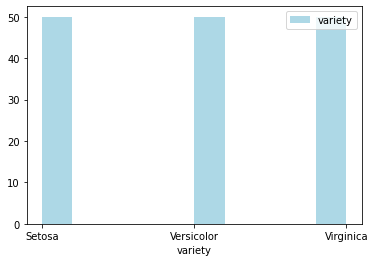

In [38]:
#直方圖 histograms
import matplotlib.pyplot as plt
plt.hist(data.variety	, density=False, color = 'lightblue', cumulative = False, label = "variety")
plt.legend()
plt.xlabel('variety')
#圖片存取-使用matplotlib.pyplot.savefig()函數
plt.savefig("/content/gdrive/MyDrive/create_folder_from_colab/savephoto.jpg")
plt.show()

In [6]:
##取得應變數資料
y=data['variety_encode']

In [7]:
#取得自變數資料
X=data.iloc[:,0:4]
X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
#故意加一些混亂資料(自變數)
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]
X

array([[ 5.1       ,  3.5       ,  1.4       , ..., -1.07709907,
        -0.4246633 , -0.8299646 ],
       [ 4.9       ,  3.        ,  1.4       , ...,  1.4121517 ,
        -1.38043075, -0.53591456],
       [ 4.7       ,  3.2       ,  1.3       , ...,  0.65880214,
        -0.59691711, -0.22295918],
       ...,
       [ 6.5       ,  3.        ,  5.2       , ..., -0.5154906 ,
        -0.12964864, -0.5092809 ],
       [ 6.2       ,  3.4       ,  5.4       , ...,  1.42147798,
        -0.61336209, -0.34432031],
       [ 5.9       ,  3.        ,  5.1       , ...,  2.53170549,
        -0.03572203,  0.17320019]])

In [9]:
#檢查資料大小
X.shape

(150, 804)

In [10]:
#分割資料集
from sklearn.model_selection import train_test_split

#可自行調整test_size值
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0, test_size = 0.5)

In [11]:
#建立決策樹模型
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier(criterion='entropy')
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [23]:
#模型準確度
y_pred = model.predict(X_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=model.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred))
Test_accuracy=accuracy_score(y_true = y_test, y_pred=y_pred)
Test_accuracy=Test_accuracy*100
print("精確度:",Test_accuracy)

Train data accuracy: 1.0
Test data accuracy: 0.84
精確度: 84.0


In [55]:
# 檔案讀寫-使用open()函數
# w+:清空檔案內容，新寫入的東西可在讀出(檔案可不存在，會自行新增)
with open('/content/gdrive/MyDrive/create_folder_from_colab/savevalue.txt', 'w+',encoding='UTF-8') as writetxt: 
    writetxt.write("精確度:"+str(Test_accuracy))

In [59]:
import time
localtime = time.localtime()
result = time.strftime("%Y-%m-%d %I:%M:%S %p", localtime)
with open('/content/gdrive/MyDrive/create_folder_from_colab/recordvalue.txt', 'a+',encoding='UTF-8') as awritetxt: 
    awritetxt.write(str(result)+"-精確度:"+str(Test_accuracy)+"\n")